In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [3]:
# Import required libraries
import os
import time
import shutil
import pathlib
import itertools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3


In [4]:
# Define a learning rate callback
def lr_rate(epoch, lr):
    if epoch < 10:
        lr = 0.0001
        return lr
    elif 10 <= epoch < 15:
        lr = 0.0005
        return lr
    elif 15 <= epoch < 30:
        lr = 0.0001
        return lr
    else:
        lr = lr * (epoch / (1 + epoch))
        return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [5]:
# Load data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.2)


In [6]:
train_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='validation')


Found 2224 images belonging to 5 classes.
Found 555 images belonging to 5 classes.


In [7]:
# Define the InceptionV3 model
inception_model = InceptionV3(
    input_shape=(224, 224, 3),
    weights='/content/drive/MyDrive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop (1).h5',
    include_top=False
)
# Build the custom model using InceptionV3 as base
model = tf.keras.Sequential([
    inception_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 21778597 (83.08 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(train_data, validation_data=valid_data, callbacks=[lr_callback], epochs=20, verbose=1, steps_per_epoch=20)

Epoch 1/20
20/20 [==============================] - 449s 23s/step - loss: 0.9941 - accuracy: 0.6250 - val_loss: 2.6790 - val_accuracy: 0.5027 - lr: 1.0000e-04
Epoch 2/20
20/20 [==============================] - 500s 25s/step - loss: 0.8975 - accuracy: 0.6375 - val_loss: 1.7732 - val_accuracy: 0.5243 - lr: 1.0000e-04
Epoch 3/20
20/20 [==============================] - 435s 22s/step - loss: 0.7941 - accuracy: 0.6953 - val_loss: 1.1089 - val_accuracy: 0.6126 - lr: 1.0000e-04
Epoch 4/20
20/20 [==============================] - 434s 22s/step - loss: 0.8617 - accuracy: 0.6656 - val_loss: 1.2592 - val_accuracy: 0.5297 - lr: 1.0000e-04
Epoch 5/20
20/20 [==============================] - 425s 21s/step - loss: 0.7556 - accuracy: 0.7147 - val_loss: 1.1487 - val_accuracy: 0.5658 - lr: 1.0000e-04
Epoch 6/20
20/20 [==============================] - 435s 22s/step - loss: 0.7353 - accuracy: 0.7219 - val_loss: 1.3127 - val_accuracy: 0.5351 - lr: 1.0000e-04
Epoch 7/20
20/20 [============================

In [11]:
# Load test data
test_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')



Found 731 images belonging to 5 classes.


In [12]:
evaluation_result = model.evaluate(test_data,verbose=1,)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

23/23 [==============================] - 104s 5s/step - loss: 0.6060 - accuracy: 0.7715
Test Loss: 0.6059902906417847
Test Accuracy: 0.7715458273887634


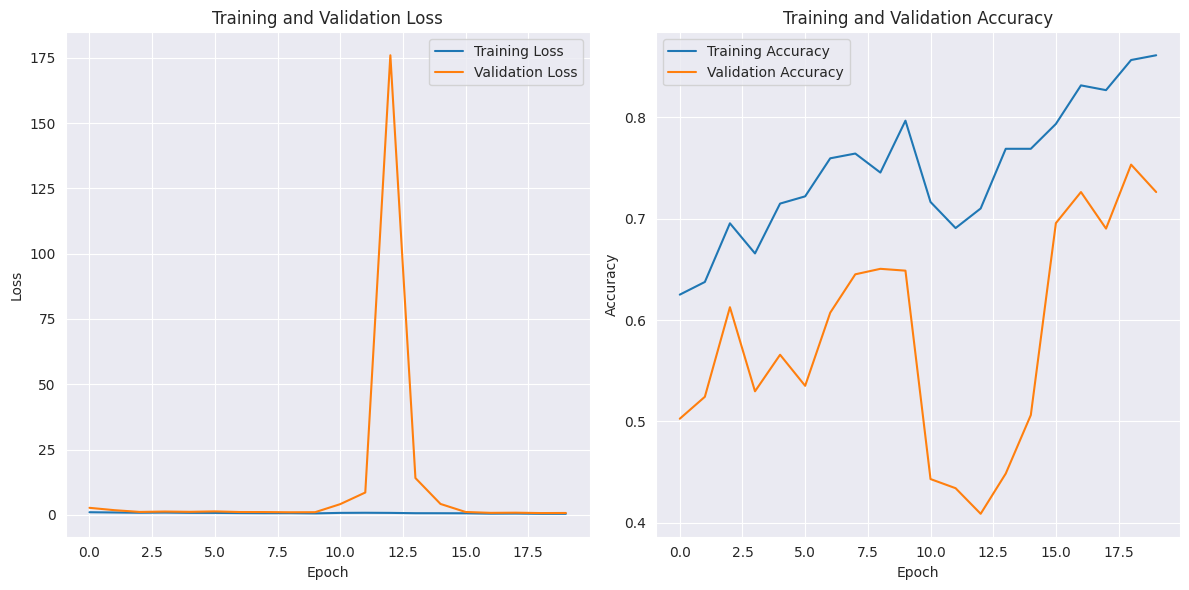

In [13]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()